In [13]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# load CSVs for data from 2008-2012
crime0812 = pd.read_csv("Source CSVs/Crime2008-2012.csv")
crime0812 = crime0812.loc[:, ~crime0812.columns.str.contains('^Unnamed')]


In [15]:
#Dropped colums in dataframe
crime_data0812 = crime0812.drop(columns =['Description', 'Longitude', 'Latitude', 'Day', 'Time', 'District',])
crime_data0812.head()

,Incident ID,Category,Year
0,130007344,LARCENY/THEFT,2012
1,121053661,STOLEN PROPERTY,2012
2,121053661,WEAPON LAWS,2012
3,121053661,OTHER OFFENSES,2012
4,136000180,LARCENY/THEFT,2012


In [16]:
#Group by category
crimeyears0812_group = crime_data0812.groupby(['Year', 'Category'])
# Count how many times each year appears in our group
crime_data0812_count = crimeyears0812_group['Category'].count()
crime_data0812_count

Year  Category     
2008  ARSON              248
      ASSAULT          12681
      BAD CHECKS          78
      BRIBERY             49
      BURGLARY          5679
                       ...  
2012  TRESPASS          1288
      VANDALISM         7808
      VEHICLE THEFT     6183
      WARRANTS          6300
      WEAPON LAWS       1455
Name: Category, Length: 191, dtype: int64

In [17]:
crime_df0812 = pd.DataFrame(crime_data0812_count)
crime_df0812 = crime_df0812.rename(columns= {"Category": "Crime Count"})
crime_df0812 = crime_df0812.reset_index()


In [18]:
# violent non violent and property

crimeCategories = []
data = {}
categories = list(crime_df0812["Category"])
crime_count = list(crime_df0812["Crime Count"])
year = list (crime_df0812["Year"])

for index in range(len(categories)):
    # violent crimes
    if(categories[index] == "ARSON" 
       or categories[index] == "RUNAWAY" 
       or categories[index] == "ASSAULT" 
       or categories[index] == "FAMILY OFFENSES"
       or categories[index] == "SEX OFFENSES, FORCIBLE" 
       or categories[index] == 'SUICIDE'
       or categories[index] == 'WEAPON LAWS'
       or categories[index] =="ROBBERY"):
        data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Violent Crime", "Year": year[index] }
    #Nonviolent crimes
    elif(categories[index] == "BAD CHECKS" 
         or categories[index] == "RUNAWAY"
         or categories[index] =='BRIBERY'
         or categories[index] =='DISORDERLY CONDUCT'
         or categories[index] == 'DRIVING UNDER THE INFLUENCE'
         or categories[index] == 'DRUG/NARCOTIC'
         or categories[index] == 'DRUNKENNESS'
         or categories[index] =='EMBEZZLEMENT'
         or categories[index] =='EXTORTION'
         or categories[index] =='FORGERY/COUNTERFEITING'
         or categories[index] =='FRAUD'
         or categories[index] =='GAMBLING'
         or categories[index] =='KIDNAPPING'
         or categories[index] =='LIQUOR LAWS'
         or categories[index] =='LOITERING'
         or categories[index] =='MISSING PERSON'
         or categories[index] =='NON-CRIMINAL'
         or categories[index] =='OTHER OFFENSES'
         or categories[index] =='PORNOGRAPHY/OBSCENE MAT'
         or categories[index] =='PROSTITUTION'
         or categories[index] =='RECOVERED VEHICLE'
         or categories[index] =='SECONDARY CODES'
         or categories[index] =='SEX OFFENSES, NON FORCIBLE'
         or categories[index] =='SUSPICIOUS OCC'
         or categories[index] =='TRESPASS'
         or categories[index] =='VANDALISM'
         or categories[index] =='WARRANTS'):
         data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Non Violent Crime","Year": year[index] }
    #Property Theift
    elif(categories[index] =="BURGLARY" 
         or categories[index] =='LARCENY/THEFT'
         or categories[index] =='STOLEN PROPERTY'
         or categories[index] =='VEHICLE THEFT'):
         data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Property Theft", "Year": year[index] }
    else:
        data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": None, "Year": year[index] }
        
    crimeCategories.append(data) 



crime_df = pd.DataFrame(crimeCategories)
    

In [19]:
crimeGroup_df = crime_df.groupby(['Crime Category', 'Year']).first()
crimeGroup_df.head()

Category  Crime Count
Crime Category    Year                         
Non Violent Crime 2008  BAD CHECKS           78
                  2009  BAD CHECKS           64
                  2010  BAD CHECKS           54
                  2011  BAD CHECKS           45
                  2012  BAD CHECKS           49

In [20]:
crimeGroup_df = crimeGroup_df.reset_index()
crimeGroup_df.head()

,Crime Category,Year,Category,Crime Count
0,Non Violent Crime,2008,BAD CHECKS,78
1,Non Violent Crime,2009,BAD CHECKS,64
2,Non Violent Crime,2010,BAD CHECKS,54
3,Non Violent Crime,2011,BAD CHECKS,45
4,Non Violent Crime,2012,BAD CHECKS,49


In [21]:
mungeCrime_df = crimeGroup_df.pivot(index ='Year', columns ='Crime Category', values=['Crime Count'])
mungeCrime_df

Crime Count                             
Crime Category Non Violent Crime Property Theft Violent Crime
Year                                                         
2008                          78           5679           248
2009                          64           5379           222
2010                          54           4966           209
2011                          45           4987           203
2012                          49           6243           237

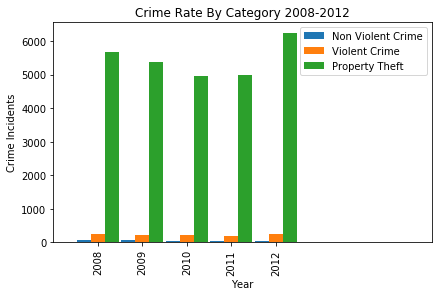

In [23]:
mungeCrime_df['Crime Count'][["Non Violent Crime", "Violent Crime", "Property Theft"]].plot(kind='bar', width=.95)

# Set textual properties
plt.legend(loc="best")

plt.tight_layout()
plt.xlim(-1, 7.5)
plt.title("Crime Rate By Category 2008-2012")
plt.xlabel("Year")
plt.ylabel("Crime Incidents")
plt.savefig("Images/CrimeCategory2008-2012.png")

In [19]:
# load CSVs for data from 2008-2012
trees_data0812 = pd.read_csv("Source CSVs/SF_Trees2007-2012.csv")
trees_data0812.head()

,Unnamed: 0,Unnamed: 0.1,Tree ID,Species,Latitude,Longitude,Year
0,2,14,102172,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.761558,-122.440979,2012
1,3,15,102171,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.761558,-122.440979,2012
2,5,21,82730,Tristaniopsis laurina :: Swamp Myrtle,37.747306,-122.405202,2008
3,28,117,82709,Casurina stricta :: Beefwood: Drooping She-Oak,37.715135,-122.388564,2009
4,83,328,103814,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.787290,-122.419810,2009


In [46]:
trees_data0812 = trees_data0812.loc[:, ~trees_data0812.columns.str.contains('^Unnamed')]
trees_data0812.head()

,Tree ID,Species,Latitude,Longitude,Year
0,102172,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.761558,-122.440979,2012
1,102171,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.761558,-122.440979,2012
2,82730,Tristaniopsis laurina :: Swamp Myrtle,37.747306,-122.405202,2008
3,82709,Casurina stricta :: Beefwood: Drooping She-Oak,37.715135,-122.388564,2009
4,103814,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.787290,-122.419810,2009


In [48]:
#Collect value of species 
trees_data0812_group = trees_data0812.groupby('Species')
trees_data0812_count = trees_data0812_group['Species'].count()
trees_data0812_count

Species
::                                                   20
Acacia baileyana 'Purpurea' :: Purple-leaf Acacia     5
Acacia baileyana :: Bailey's Acacia                  14
Acacia cognata :: River Wattle                        1
Acacia decurrens :: Acacia: Silver Wattle             1
                                                     ..
Ulmus pumila :: Siberian Elm                          4
Washingtonia filifera :: California Fan Palm          2
Washingtonia robusta :: Mexican Fan Palm             15
Yucca elephantipes :: Giant Yucca                     6
Yucca gloriosa :: Spanish Dagger                     28
Name: Species, Length: 264, dtype: int64

In [58]:
#Drop "::" from Index list
#is_2002 =  gapminder['year']==2002
trees0812s = trees_data0812[trees_data0812["Species"] !="::"]
trees0812s

,Tree ID,Species,Latitude,Longitude,Year
0,102172,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.761558,-122.440979,2012
1,102171,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.761558,-122.440979,2012
2,82730,Tristaniopsis laurina :: Swamp Myrtle,37.747306,-122.405202,2008
3,82709,Casurina stricta :: Beefwood: Drooping She-Oak,37.715135,-122.388564,2009
4,103814,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.787290,-122.419810,2009
5,103815,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.787304,-122.419711,2009
6,10245,Pyrus calleryana :: Ornamental Pear,37.772882,-122.423805,2008
7,103788,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.788328,-122.419385,2009
8,103790,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.788328,-122.419385,2009
9,103789,Prunus serrulata 'Kwanzan' :: Kwanzan Flowerin...,37.788328,-122.419385,2009


In [60]:
# Collect the mean species of trees
#treespecies0307 = trees0307.value_counts()
df = trees0812s.groupby(['Species', "Year"]).size()
pd.DataFrame(df)

#species =  treespecies0307.keys()
#trees0307.value_counts()

0
Species                                           Year    
Acacia baileyana 'Purpurea' :: Purple-leaf Acacia 2008   1
                                                  2010   2
                                                  2012   2
Acacia baileyana :: Bailey's Acacia               2008   9
                                                  2009   2
...                                                     ..
Washingtonia robusta :: Mexican Fan Palm          2012   3
Yucca elephantipes :: Giant Yucca                 2008   4
                                                  2011   2
Yucca gloriosa :: Spanish Dagger                  2008  27
                                                  2009   1

[701 rows x 1 columns]